In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/apple/Downloads/sales_data_2.csv')
df

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1
...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18
66,2023-08-27,Vendor8,88.79,14,Customer3,105.59,5
67,2023-08-27,Vendor5,63.30,81,Customer5,92.92,32
68,2023-08-27,Vendor5,94.06,18,Customer5,125.67,4


6.3 day average of the daily gross profit

In [3]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Calculate the total revenue for each transaction
df['Total Revenue'] = df['Selling price'] * df['Quantity sold']

In [9]:
# Calculate the total COGS for each transaction
df['Total COGS'] = df['Buying price'] * df['Quantity sold']

In [10]:
# Calculate the gross profit for each transaction
df['Gross Profit'] = df['Total Revenue'] - df['Total COGS']

In [11]:
# Calculate the 3-day average of daily gross profit
df['3-Day Moving Avg Gross Profit'] = df['Gross Profit'].rolling(window=3).mean()


In [12]:
# Print the DataFrame with the average profit
print(df[['Date', 'Gross Profit', '3-Day Moving Avg Gross Profit']])

         Date  Gross Profit  3-Day Moving Avg Gross Profit
0  2023-08-21        856.68                            NaN
1  2023-08-21        146.71                            NaN
2  2023-08-21        297.45                     433.613333
3  2023-08-21         87.64                     177.266667
4  2023-08-21         42.01                     142.366667
..        ...           ...                            ...
65 2023-08-27        407.34                     552.863333
66 2023-08-27         84.00                     552.070000
67 2023-08-27        947.84                     479.726667
68 2023-08-27        126.44                     386.093333
69 2023-08-27         25.88                     366.720000

[70 rows x 3 columns]


7.Plotting the 3 day average gross profit

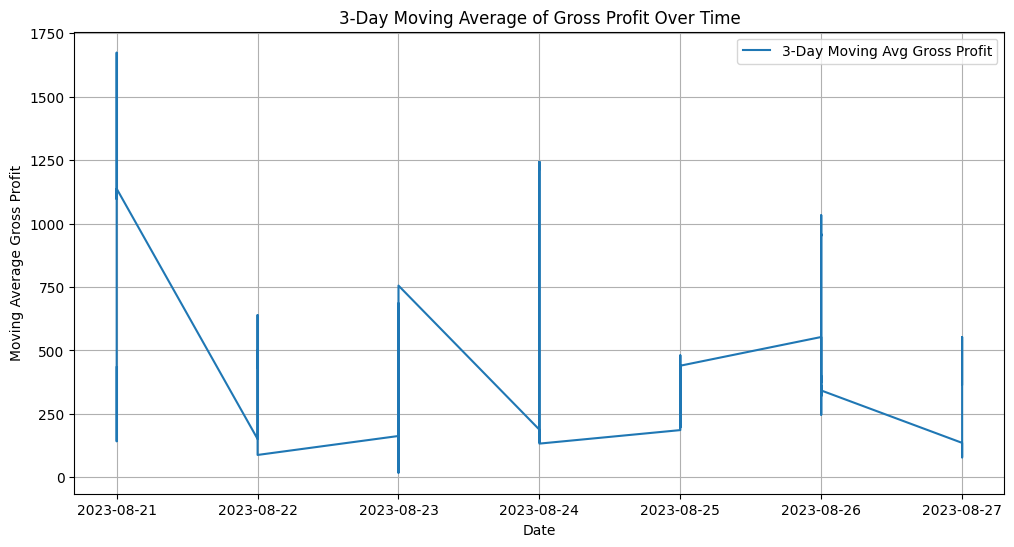

In [14]:
# Plot the 3-day average profit over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['3-Day Moving Avg Gross Profit'], label='3-Day Moving Avg Gross Profit')
plt.xlabel('Date')
plt.ylabel('Moving Average Gross Profit')
plt.title('3-Day Moving Average of Gross Profit Over Time')
plt.legend()
plt.grid(True)
plt.show()

8.Can you optimize the sales process to ensure gross margin is maximized?
    
    - Would you fire any vendor?
    - Would you let go of any customer?

In [75]:
# Calculate gross profit for each transaction
df['Gross Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']

# Calculate overall gross margin
total_gross_profit = df['Gross Profit'].sum()
total_sales = df['Selling price'].sum()
overall_gross_margin = (total_gross_profit / total_sales) * 100

print(f"Overall Gross Margin: {overall_gross_margin:.2f}%")


Overall Gross Margin: 608.49%


In [82]:
# Define the desired gross margin
desired_gross_margin = 40.0  

# Calculate the price adjustment factor to achieve the desired margin
price_adjustment_factor = desired_gross_margin / overall_gross_margin

# Apply the price adjustment to achieve the desired gross margin
df['Adjusted Selling Price'] = df['Selling price'] * price_adjustment_factor

# Calculate the new gross profit based on the adjusted prices
df['New Gross Profit'] = (df['Adjusted Selling Price'] - df['Buying price']) * df['Quantity sold']

# Calculate the new overall gross margin
new_total_gross_profit = df['New Gross Profit'].sum()
new_total_sales = df['Adjusted Selling Price'].sum()
new_gross_margin = (new_total_gross_profit / new_total_sales) * 100

# Print the results
print(f"Desired Gross Margin: {desired_gross_margin:.2f}%")
print(f"Overall Gross Margin before adjustment: {overall_gross_margin:.2f}%")
print(f"Price Adjustment Factor: {price_adjustment_factor:.2f}")
print(f"Overall Gross Margin after adjustment: {new_gross_margin:.2f}%")



Desired Gross Margin: 40.00%
Overall Gross Margin before adjustment: 608.49%
Price Adjustment Factor: 0.07
Overall Gross Margin after adjustment: -25849.96%


9.To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

In [17]:
# Calculate the 25th, 50th (median), and 75th percentiles for buying and selling prices
percentiles = [25, 50, 75]  

buying_price_percentiles = df['Buying price'].quantile([0.25, 0.50, 0.75])
selling_price_percentiles = df['Selling price'].quantile([0.25, 0.50, 0.75])

In [18]:
# Print the percentiles for buying prices
print("Buying Price Percentiles:")
print(buying_price_percentiles)

Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64


In [19]:
# Print the percentiles for selling prices
print("\nSelling Price Percentiles:")
print(selling_price_percentiles)


Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


10.Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [62]:
# Extract buying and selling prices from the DataFrame
buying_prices = df['Buying price'].values
selling_prices = df['Selling price'].values

In [68]:
if len(buying_prices) > 0 and len(selling_prices) > 0:
    # Calculate the percentiles
    percentiles = [25, 50, 75]
    buying_percentiles = np.percentile(buying_prices, percentiles)
    selling_percentiles = np.percentile(selling_prices, percentiles)

    # Print the results
    for i, p in enumerate(percentiles):
        print(f"Buying Price {p}th percentile: {buying_percentiles[i]}")
        print(f"Selling Price {p}th percentile: {selling_percentiles[i]}")
else:
    print("No data available for percentile calculations.")

Buying Price 25th percentile: 29.9
Selling Price 25th percentile: 38.975
Buying Price 50th percentile: 60.76
Selling Price 50th percentile: 78.99000000000001
Buying Price 75th percentile: 78.32000000000001
Selling Price 75th percentile: 103.39750000000001


11.Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

In [57]:
# Filter the data for transactions with "Firm bought" equal to "Vendor 4"
vendor_4_data = df[df['Firm bought from'] == 'Vendor4']
vendor_4_data

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Total Revenue,Total COGS,Gross Profit,3-Day Moving Avg Gross Profit
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,1423.07,1276.36,146.71,NaN
29,2023-08-23,Vendor4,50.49,43,Customer10,59.99,41,2459.59,2070.09,389.50,755.750000
34,2023-08-24,Vendor4,99.23,95,Customer1,131.98,92,12142.16,9129.16,3013.00,1242.630000
49,2023-08-25,Vendor4,17.85,80,Customer5,20.47,20,409.40,357.00,52.40,440.043333
54,2023-08-26,Vendor4,82.77,66,Customer8,124.13,65,8068.45,5380.05,2688.40,959.096667
59,2023-08-26,Vendor4,28.90,88,Customer8,36.83,11,405.13,317.90,87.23,342.363333
62,2023-08-27,Vendor4,68.27,22,Customer4,100.62,1,100.62,68.27,32.35,81.236667
63,2023-08-27,Vendor4,83.76,34,Customer3,96.10,7,672.70,586.32,86.38,78.670000
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18,1574.10,1166.76,407.34,552.863333


In [58]:
# Calculate the total revenue for Vendor 4 transactions
total_revenue = (vendor_4_data['Selling price'] * vendor_4_data['Quantity sold']).sum()

# Calculate the total cost of goods sold (COGS) for Vendor 4 transactions
total_cogs = (vendor_4_data['Buying price'] * vendor_4_data['Quantity sold']).sum()

# Calculate the gross margin for Vendor 4 as a single value
gross_margin = ((total_revenue - total_cogs) / total_revenue) * 100

# Print the gross margin for Vendor 4
print(f"The gross margin for Vendor 4 is {gross_margin:.2f}%")

The gross margin for Vendor 4 is 25.33%


In [59]:
# Define your current gross margin with Vendor 4
current_gross_margin = 25.33  

# Define scenarios with different cost and pricing factors
scenarios = [
    {"cost_increase": 0.05, "price_increase": 0.02, "quality_impact": 0.01},
    {"cost_increase": 0.03, "price_increase": 0.01, "quality_impact": 0.02},
    # Add more scenarios as needed
]

# Calculate the gross margin for each scenario
for scenario in scenarios:
    cost_increase = scenario["cost_increase"]
    price_increase = scenario["price_increase"]
    quality_impact = scenario["quality_impact"]
    
    # Calculate the new gross margin for the scenario
    new_gross_margin = current_gross_margin - cost_increase + price_increase - quality_impact
    
    # Print the results
    print(f"Scenario: Cost +{cost_increase}, Price +{price_increase}, Quality -{quality_impact}")
    print(f"New Gross Margin: {new_gross_margin}")


Scenario: Cost +0.05, Price +0.02, Quality -0.01
New Gross Margin: 25.289999999999996
Scenario: Cost +0.03, Price +0.01, Quality -0.02
New Gross Margin: 25.29


12.Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch?

In [61]:
# Group data by vendors and calculate the mean gross margin for each vendor
vendor_gross_margin = df.groupby('Firm bought from').apply(
    lambda group: ((group['Selling price'] * group['Quantity sold']).sum() - (group['Buying price'] * group['Quantity bought']).sum()) /
    (group['Selling price'] * group['Quantity sold']).sum() * 100
)

# Identify the vendor with the highest mean gross margin
best_vendor = vendor_gross_margin.idxmax()

# Print the vendor with the highest mean gross margin
print(f"The vendor with the highest mean gross margin is: {best_vendor}")

# Calculate the theoretical maximum gross margin by considering the best vendor's terms
theoretical_max_margin = vendor_gross_margin.max()

# Print the theoretical maximum gross margin
print(f"The theoretical maximum gross margin with {best_vendor} is: {theoretical_max_margin:.2f}%")

The vendor with the highest mean gross margin is: Vendor3
The theoretical maximum gross margin with Vendor3 is: -8.33%


13.Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

In [74]:
# Extract relevant columns from the DataFrame
buying_price = df["Buying price"]
selling_price = df["Selling price"]
quantity_sold = df["Quantity sold"]


In [71]:
# Calculate the percentage change in quantity and price
percentage_change_price = (selling_price - buying_price) / buying_price
percentage_change_quantity = (quantity_sold.diff() / quantity_sold.shift(1)).fillna(0)

In [72]:
# Calculate the price elasticity
price_elasticity = percentage_change_quantity / percentage_change_price

In [73]:
# Display the results
df["Price Elasticity"] = price_elasticity
print(df)

         Date Firm bought from  Buying price  Quantity bought   Customer  \
0  2023-08-21          Vendor6         72.11               60  Customer7   
1  2023-08-21          Vendor4         75.08               92  Customer7   
2  2023-08-21          Vendor7         83.93               16  Customer2   
3  2023-08-21          Vendor7         52.01               62  Customer3   
4  2023-08-21          Vendor2         98.91                1  Customer5   
..        ...              ...           ...              ...        ...   
65 2023-08-27          Vendor4         64.82               28  Customer6   
66 2023-08-27          Vendor8         88.79               14  Customer3   
67 2023-08-27          Vendor5         63.30               81  Customer5   
68 2023-08-27          Vendor5         94.06               18  Customer5   
69 2023-08-27          Vendor5         56.28               25  Customer6   

    Selling price  Quantity sold  Total Revenue  Total COGS  Gross Profit  \
0         